In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


EDA Tasks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


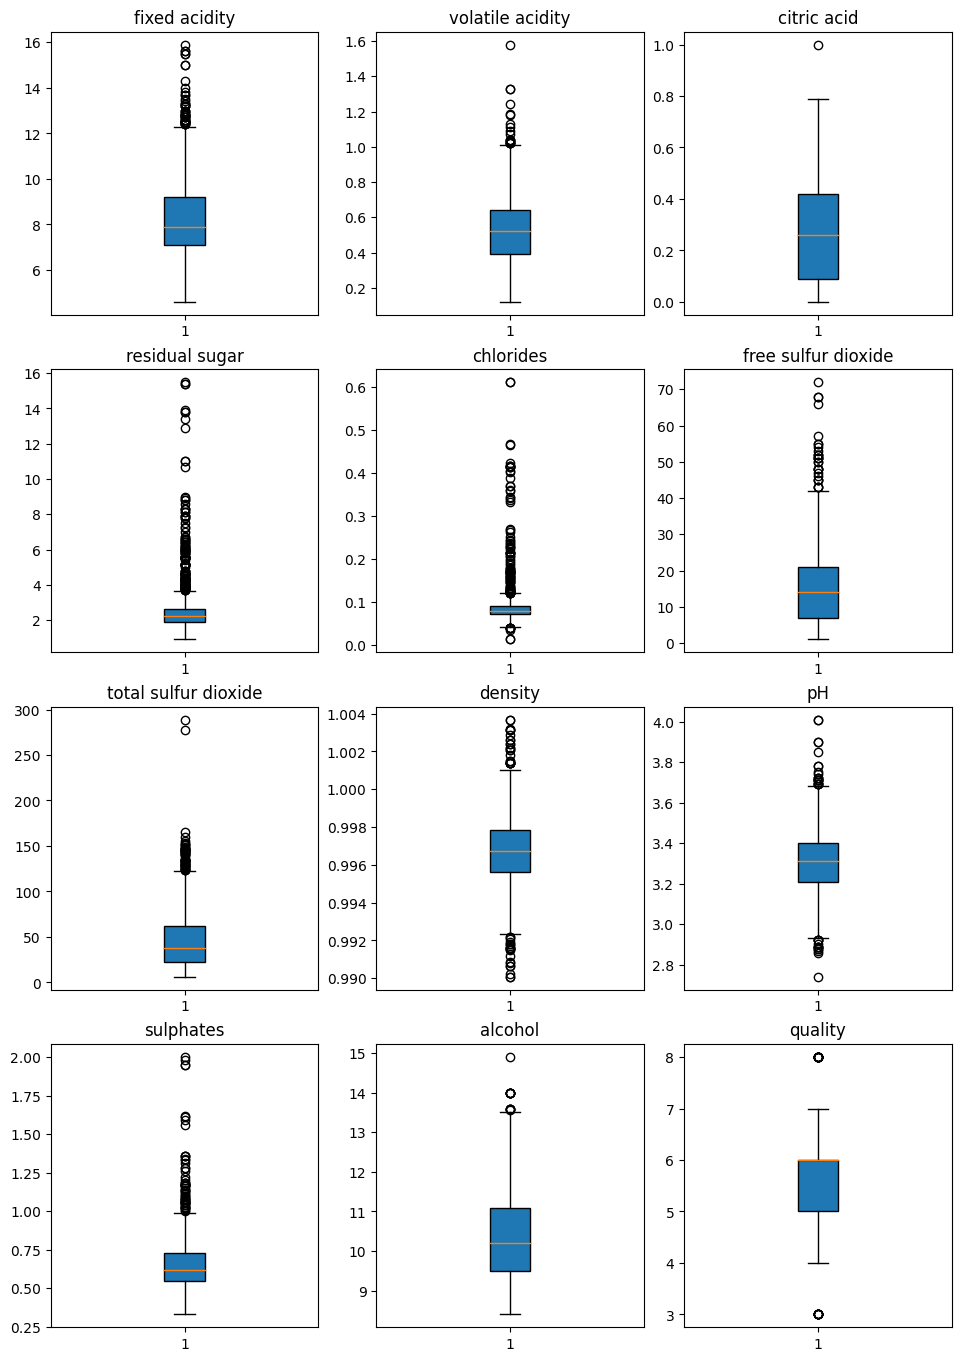

In [7]:
from matplotlib import pyplot as plt

fig, axis = plt.subplots(ncols=3, nrows=4, figsize=(9.5, 13.5),
                        constrained_layout=True)

attr=0
cols=df.columns

for row in range(4):
    for col in range(3):
        axis[row,col].boxplot(df.iloc[:,attr], patch_artist=True,
                showmeans=False, showfliers=True)
        axis[row,col].set_title(cols[attr])
        attr+=1
plt.show()


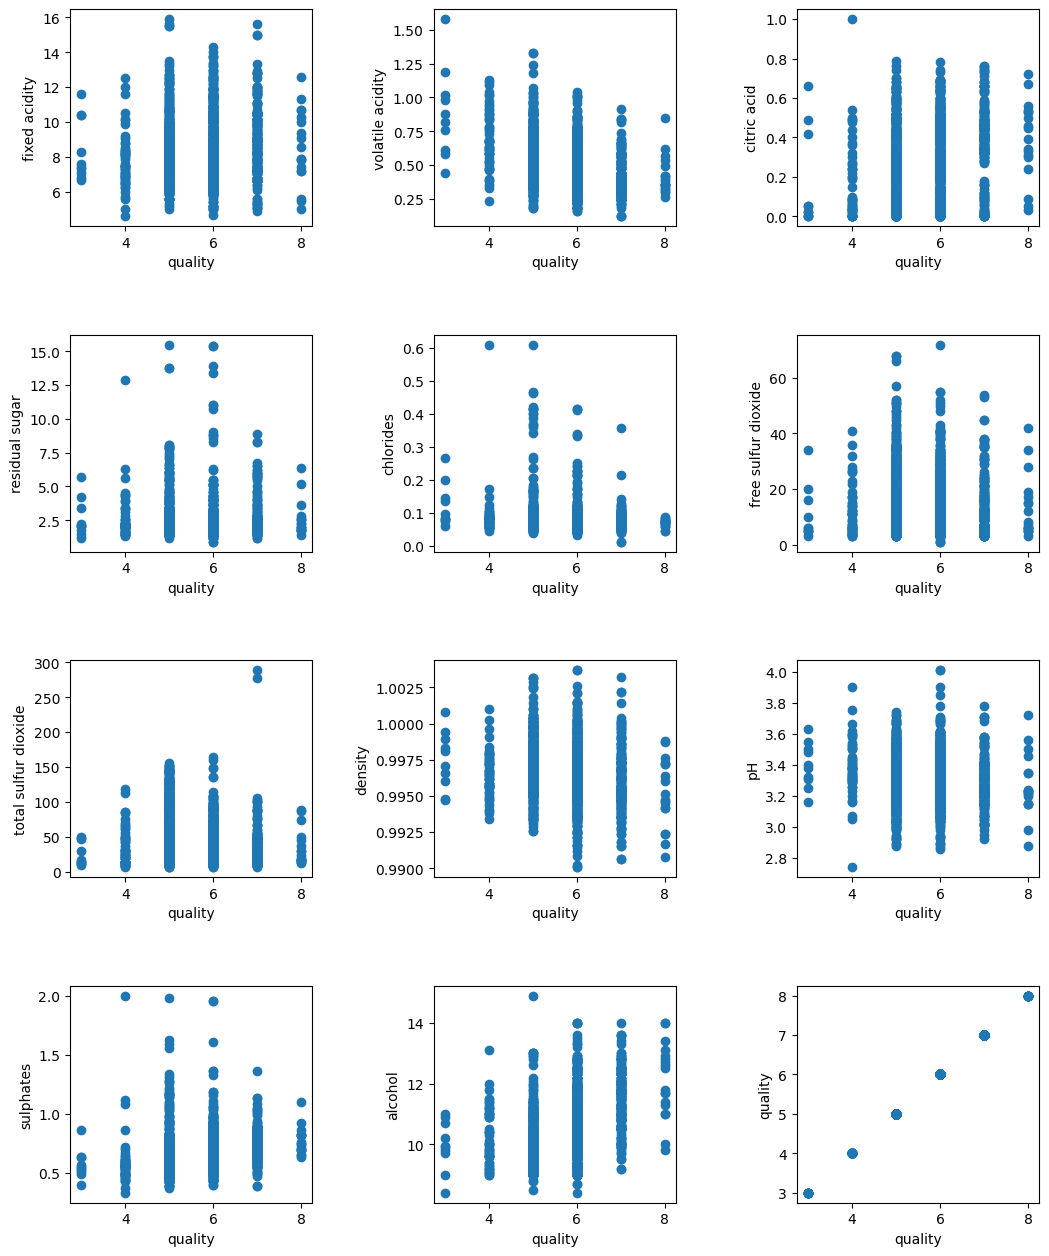

In [8]:
from matplotlib import pyplot as plt

fig, axis = plt.subplots(ncols=3, nrows=4, figsize=(12.5, 15.5),
                        constrained_layout=False)

attr=0
cols=df.columns

for row in range(4):
    for col in range(3):
        axis[row,col].scatter(df.iloc[:,-1],df.iloc[:,attr])
        axis[row,col].set_ylabel(cols[attr])
        axis[row,col].set_xlabel(cols[-1])
        attr+=1
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

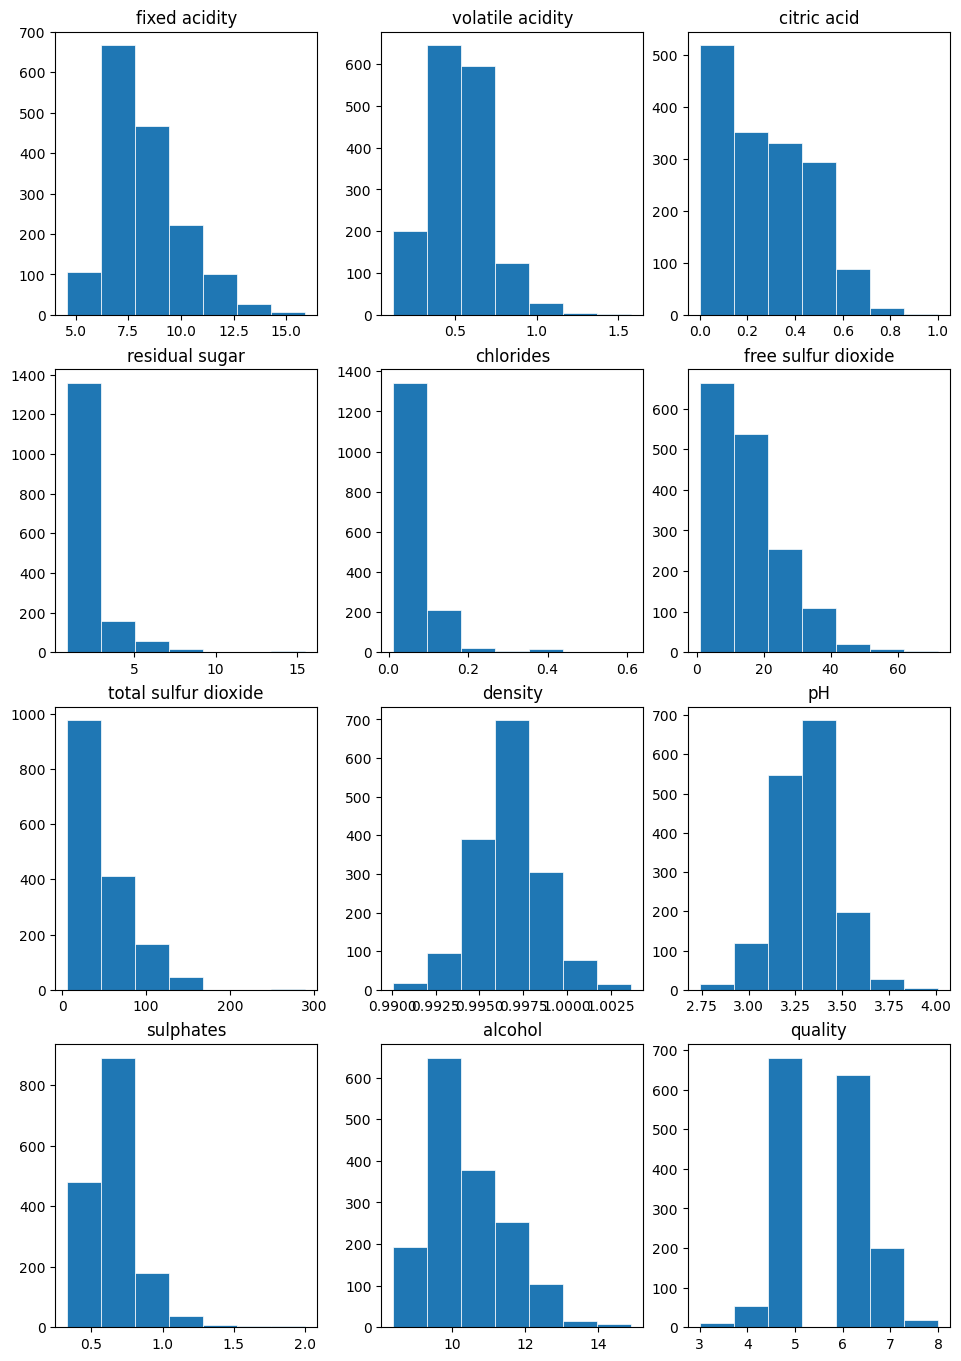

In [9]:
from matplotlib import pyplot as plt

fig, axis = plt.subplots(ncols=3, nrows=4, figsize=(9.5, 13.5),
                        constrained_layout=True)

attr=0
cols=df.columns

for row in range(4):
    for col in range(3):
        axis[row,col].hist(df.iloc[:,attr], bins=7,
                linewidth=0.5, edgecolor="white")
        axis[row,col].set_title(cols[attr])
        attr+=1
plt.show()

EDA Conclusion:-


(1) There are no missing/infinite values in the data

(2) The dataframe has duplicate values-->remove in preprocessing

(3) There are outliers in the dataset as verified through the box plot-->adjust/remove in preprocessing

(4) Random distribution with different scales-->perfrom Normalization using min-max scaler

(5) Divide with pivot point as 6 on quality



DATA PREPROCESSING TASKS

In [10]:
df.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [11]:
nya_df=df.copy()
nya_df["class"]=[int(x) for x in (df["quality"]>=6)]
nya_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [12]:
(nya_df["class"]==1).sum()

855

In [13]:
(nya_df["class"]==0).sum()

744

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

features=nya_df.iloc[:,0:-2]
target=nya_df.iloc[:,-1]

scaler.fit(features)
scaled_features=scaler.transform(features)
scaled_features=pd.DataFrame(scaled_features,columns=[features.columns])

scaled_features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [17]:
df2=scaled_features.copy()
df2["class"]=target
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0


Feature Engineering

In [18]:
corr_matrix = df2.corr()
print(corr_matrix)

                     fixed acidity volatile acidity citric acid  \
fixed acidity             1.000000        -0.256131    0.671703   
volatile acidity         -0.256131         1.000000   -0.552496   
citric acid               0.671703        -0.552496    1.000000   
residual sugar            0.114777         0.001918    0.143577   
chlorides                 0.093705         0.061298    0.203823   
free sulfur dioxide      -0.153794        -0.010504   -0.060978   
total sulfur dioxide     -0.113181         0.076470    0.035533   
density                   0.668047         0.022026    0.364947   
pH                       -0.682978         0.234937   -0.541904   
sulphates                 0.183006        -0.260987    0.312770   
alcohol                  -0.061668        -0.202288    0.109903   
class                     0.095093        -0.321441    0.159129   

                     residual sugar chlorides free sulfur dioxide  \
fixed acidity              0.114777  0.093705           -0.

Correation Matrix Conclusions:- 

(1) There is no strong correlation b/w independent features

(2) One correlations with target feature found:-
(a) alcohol


In [19]:
scaled_features.drop(["alcohol"],axis=1,inplace=True,level=0)
scaled_features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725


MODEL TRAINING

In [20]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf','poly'), 'C':(0.1,1,10,5),'degree':(1,2,3)}

svc = svm.SVC()
clf = GridSearchCV(svc, parameters)

clf.fit(scaled_features,target)
best_params = clf.best_params_
best_score = clf.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Best Hyperparameters: {'C': 10, 'degree': 1, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.729817789968652


In [118]:
from sklearn.ensemble import GradientBoostingClassifier as xgb

parameters = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
}

xgb_classifier = xgb()

clf = GridSearchCV(xgb_classifier, parameters)

clf.fit(scaled_features,target)
best_params = clf.best_params_
best_score = clf.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best Cross-Validation Score: 0.8792966300940439


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'hidden_layer_sizes': [(100,)],
    'activation': ['relu','logistic'],
    'alpha': [0.01],
    'max_iter': [500]
}

mlp = MLPClassifier()

grid_search = GridSearchCV(mlp, parameters, cv=5, n_jobs=-1)

grid_search.fit(scaled_features,target)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score


X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.20, random_state=42)

best_svm= svm.SVC(C=2,kernel="rbf")
best_svm.fit(X_train, y_train)

best_xgb = xgb(learning_rate=0.01, max_depth= 3, n_estimators=100)
best_xgb.fit(X_train, y_train)

best_mlp = MLPClassifier(hidden_layer_sizes= (100,),
    activation='relu',
    alpha=0.01,
    max_iter=500)
best_mlp.fit(X_train,y_train)

svm_preds = best_svm.predict(X_test)
xgb_preds = best_xgb.predict(X_test)
mlp_preds = best_mlp.predict(X_test)

# AUC
svm_auc = roc_auc_score(y_test, svm_preds)
xgb_auc = roc_auc_score(y_test, xgb_preds)
mlp_auc = roc_auc_score(y_test, mlp_preds)

# Accuracy
svm_accuracy = accuracy_score(y_test, svm_preds)
xgb_accuracy = accuracy_score(y_test, xgb_preds)
mlp_accuracy = accuracy_score(y_test, mlp_preds)

# F1-score
svm_f1 = f1_score(y_test, svm_preds, average='weighted')
xgb_f1 = f1_score(y_test, xgb_preds, average='weighted')
mlp_f1 = f1_score(y_test, mlp_preds, average='weighted')

# Results
print("SVM AUC:", svm_auc)
print("XGBoost AUC:", xgb_auc)
print("MLP:",mlp_auc)
print("\nSVM Accuracy:", svm_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)
print("MLP:",mlp_accuracy)
print("\nSVM F1 Score:", svm_f1)
print("XGBoost F1 Score:", xgb_f1)
print("MLP:",mlp_f1)

/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


SVM AUC: 0.7514758904869449
XGBoost AUC: 0.6904393993422877
MLP: 0.7469590712785767

SVM Accuracy: 0.753125
XGBoost Accuracy: 0.7
MLP: 0.753125

SVM F1 Score: 0.7535270725784959
XGBoost F1 Score: 0.6978093403948002
MLP: 0.7523502490660026


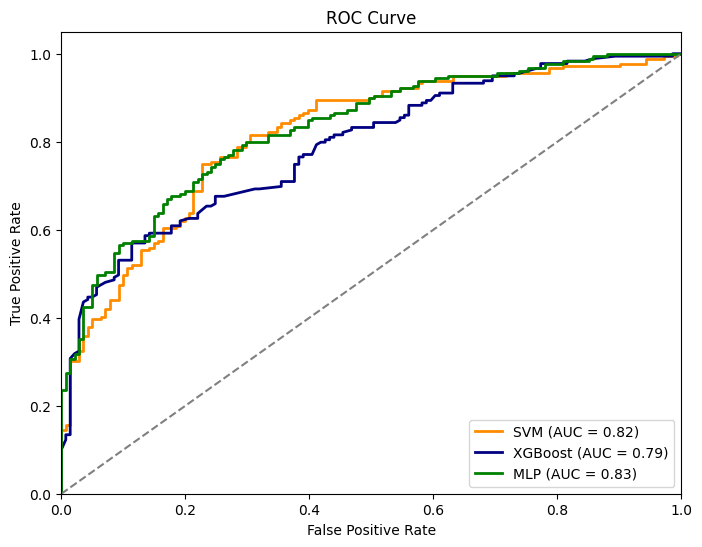

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# svm
svm_probs = best_svm.decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# xgboost
xgb_probs = best_xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# mlp
mlp_probs = best_mlp.predict_proba(X_test)[:, 1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp_probs)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='navy', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_mlp, tpr_mlp, color='green', lw=2, label=f'MLP (AUC = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
